# Synthetic data testing

## Setup

In [1]:
%matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import scipy
from tape_funcs import *

/var/folders/wq/g7drmmmd3j5g8w0z4hk11sp00000gn/T/ipykernel_3690/440150107.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)

In [3]:
yy, xx = np.mgrid[-2*np.pi:2*np.pi:500j, -2*np.pi:2*np.pi:500j]

In [4]:
theta = np.pi/3
scale = 3
z = np.cos((-xx * np.sin(theta) + yy * np.cos(theta))*scale)

In [5]:
noisy = True
rng = np.random.default_rng()
if noisy:
    z = z + rng.normal(0, 0.6, z.shape)

In [6]:
mpl.rc('text', usetex = True)

In [7]:
## Set up sampling parameters
center_pt = (249, 249)
width = 127
width_ratio = 1/2
sample_length = 255
sample_ratio = 1

In [8]:
hsv = mpl.colormaps['hsv']

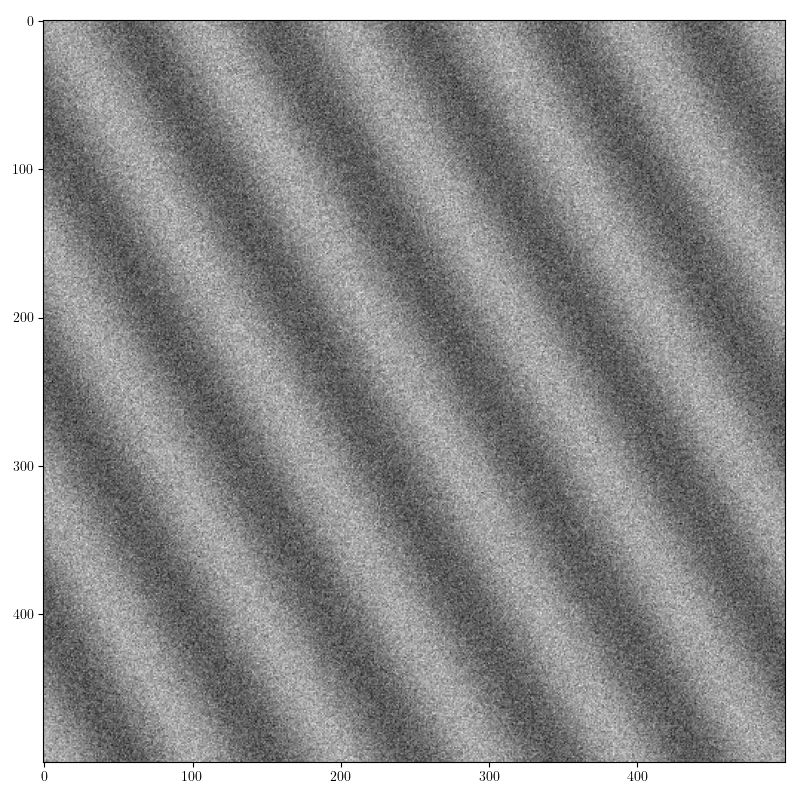

In [9]:
F_img, ax_img = plt.subplots(1, 1, figsize=(8, 8))
ax_img.imshow(z, cmap='gray')
# plt.xticks([0, 124, 249, 374, 499], ['$-2\pi$', '$-\pi$', 0, '$\pi$', '$2\pi$'])
# plt.yticks([0, 124, 249, 374, 499], ['$-2\pi$', '$-\pi$', 0, '$\pi$', '$2\pi$'])
# angles = np.linspace(-np.pi/2, np.pi/2, 9)[:-1]
# colors = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'purple', 'black', 'gray']
# for i, angle in enumerate(angles):
#     ax.add_patch(sample_box_disp(center_pt, angle, width=width, sample_length=sample_length, color=colors[i]))
F_img.tight_layout()

In [10]:
A = parallel_line_vals(z, center_pt, 0, width=width, width_ratio=width_ratio, sample_length=sample_length, sample_ratio=sample_ratio)

  0%|          | 0/63 [00:00<?, ?it/s]

In [11]:
A.shape

(63, 255)

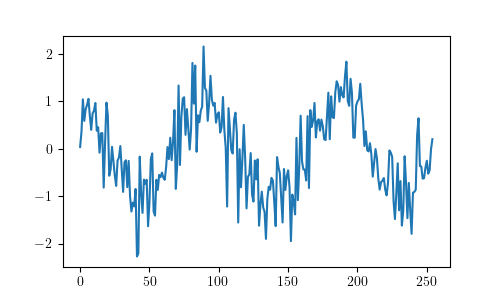

In [12]:
F, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(A[0, :])

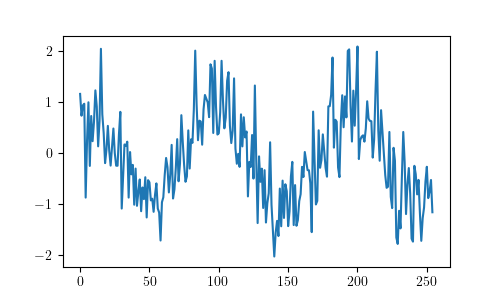

In [13]:
F, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(A[7, :])

In [14]:
raw_tape = TAPE_raw(z, center_pt, width=width, width_ratio=width_ratio, sample_length=sample_length, sample_ratio=sample_ratio, plot=True, plot_ax=ax_img)

  0%|          | 0/8 [00:00<?, ?it/s]

In [14]:
raw_tape.shape

(63, 255, 8)

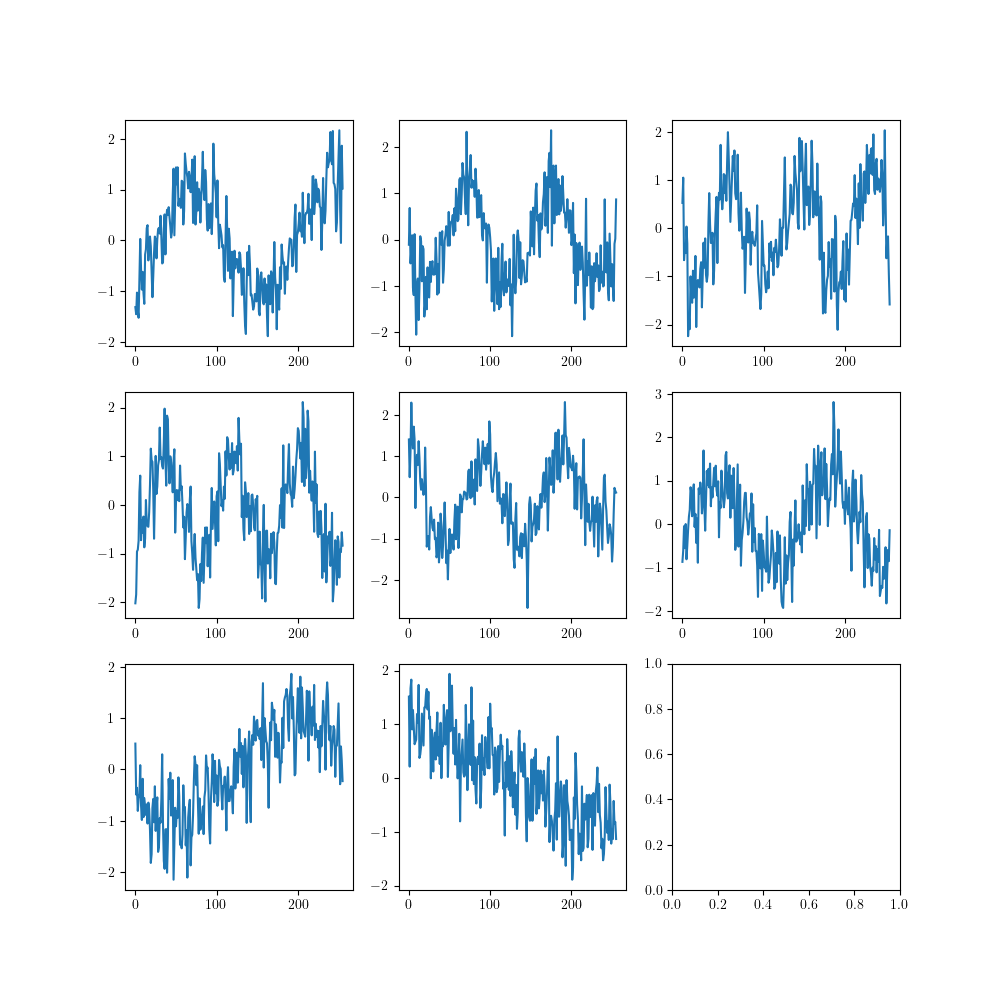

In [112]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(raw_tape[0, :, i])

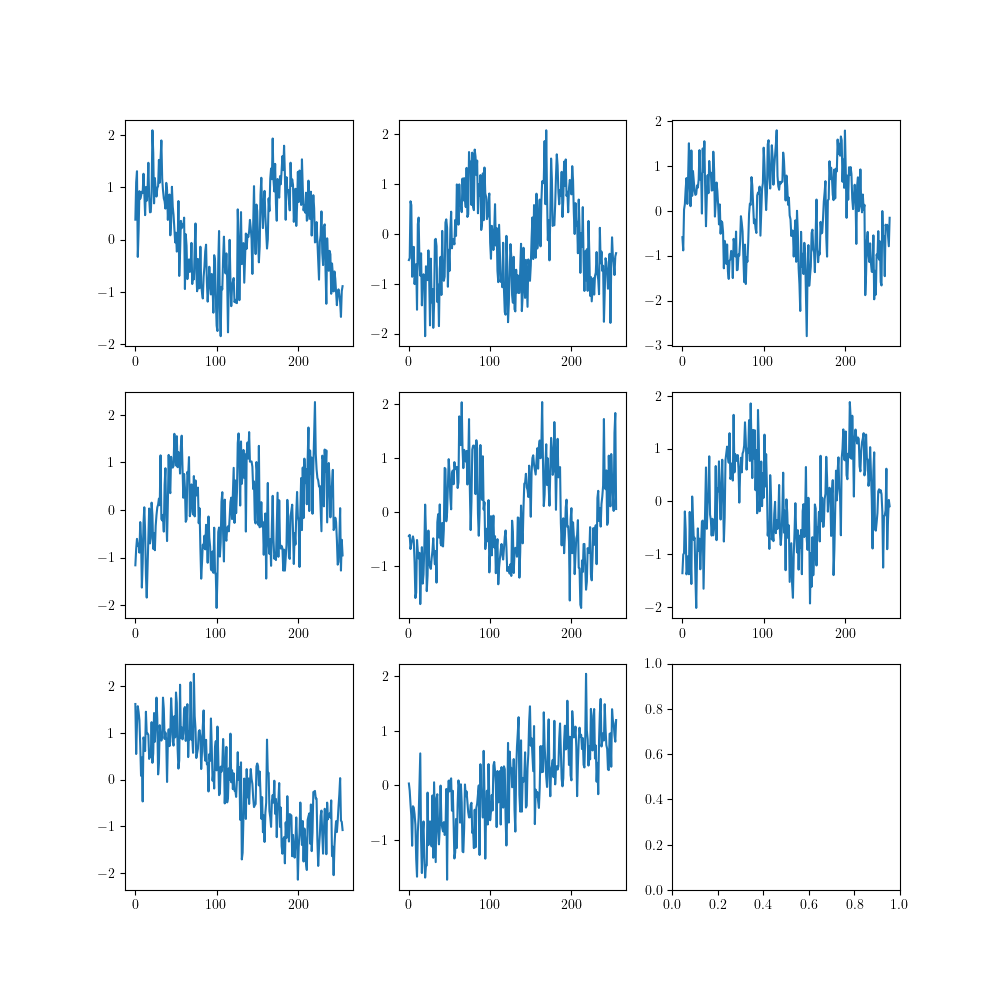

In [114]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(raw_tape[7, :, i])

In [125]:
mean_tape = np.mean(raw_tape, axis=0)

In [126]:
mean_tape.shape

(256, 8)

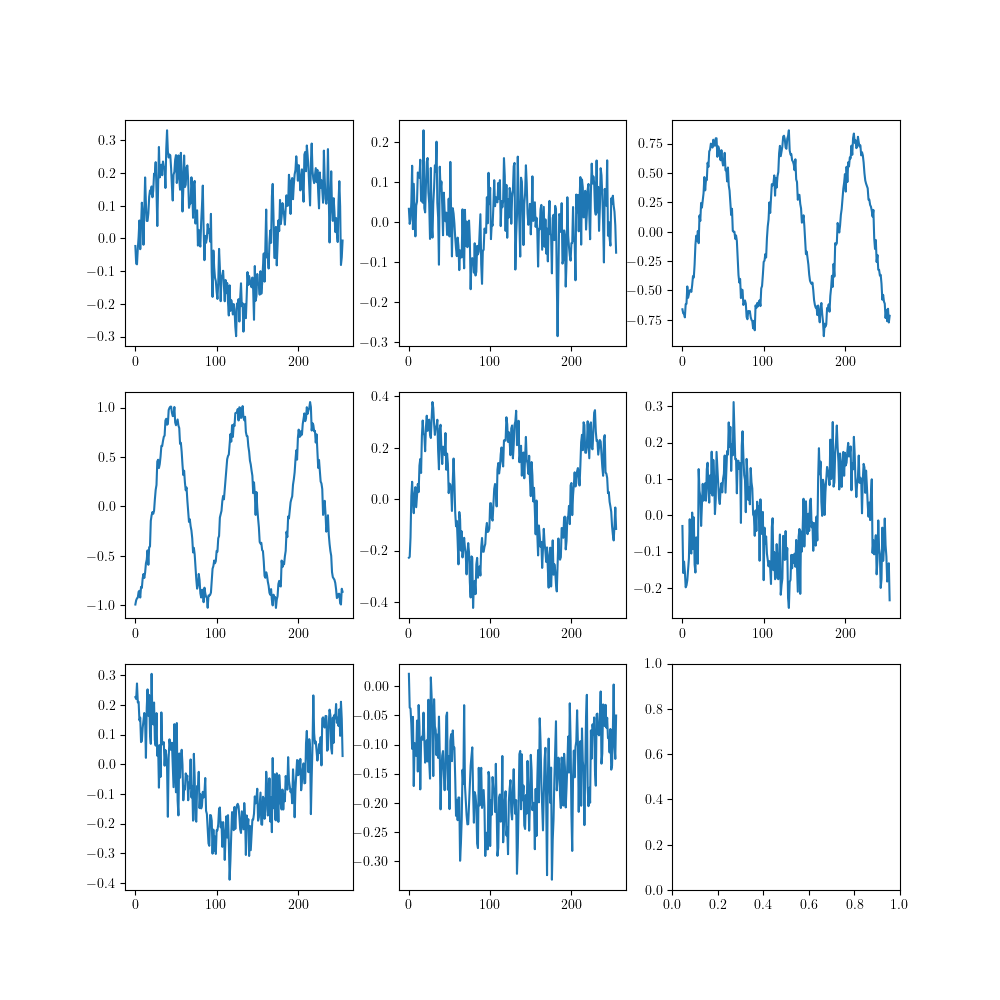

In [127]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(mean_tape[:, i])

In [128]:
mean_tape_fft = np.fft.rfft(mean_tape, axis=0)

/Users/verhoef/miniconda3/envs/harmonic_gw/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


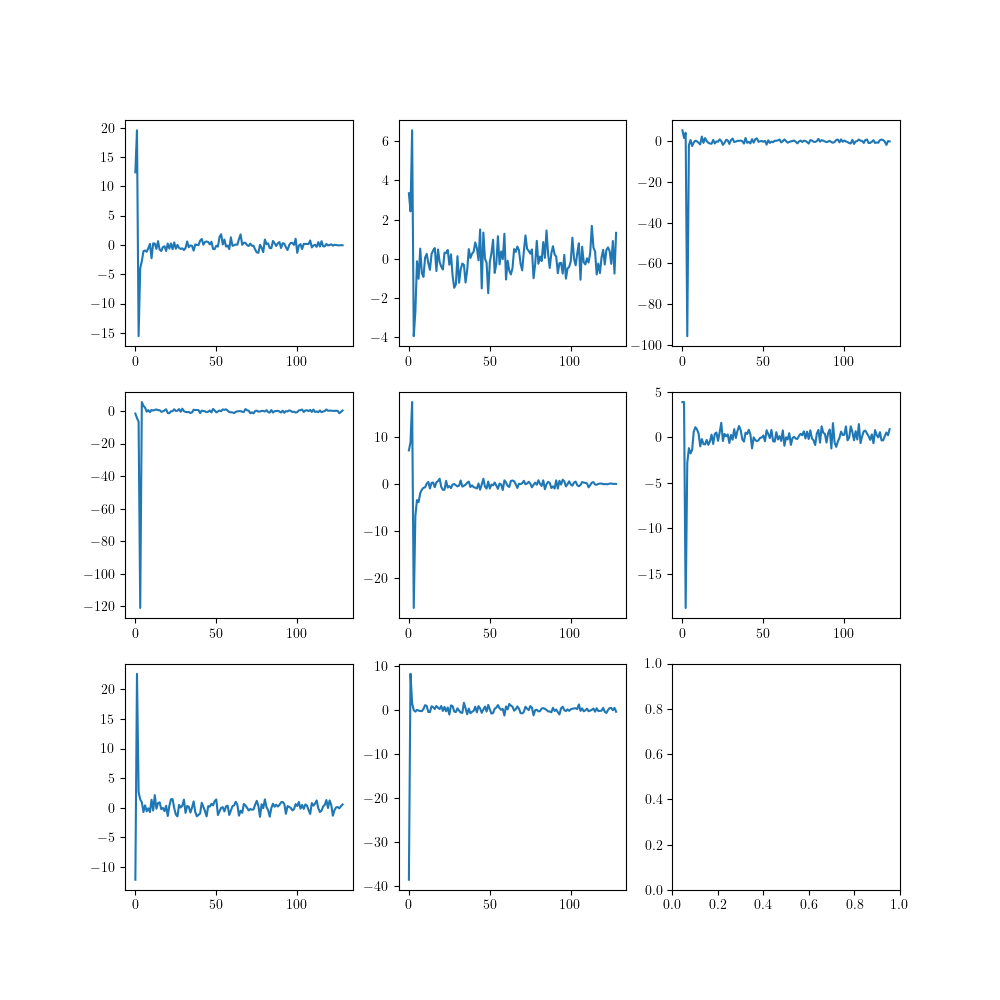

In [129]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(mean_tape_fft[:, i])

In [132]:
[np.argmax(np.abs(mean_tape_fft[:, i])) for i in range(mean_tape_fft.shape[-1])]

[1, 2, 3, 3, 3, 2, 1, 0]

In [133]:
[np.max(np.abs(mean_tape_fft[:, i])) for i in range(mean_tape_fft.shape[-1])]

[19.56280295349377,
 6.6152828024269,
 95.82376361201375,
 120.97521972905011,
 26.388431221009952,
 18.776202352596336,
 22.65892257550937,
 38.57605085592343]

In [28]:
def kth_root(arg, root):
    res = np.power(np.abs(arg), 1./root)
    return res*np.sign(arg)

In [29]:
mult_tape = np.prod(raw_tape, axis=0)

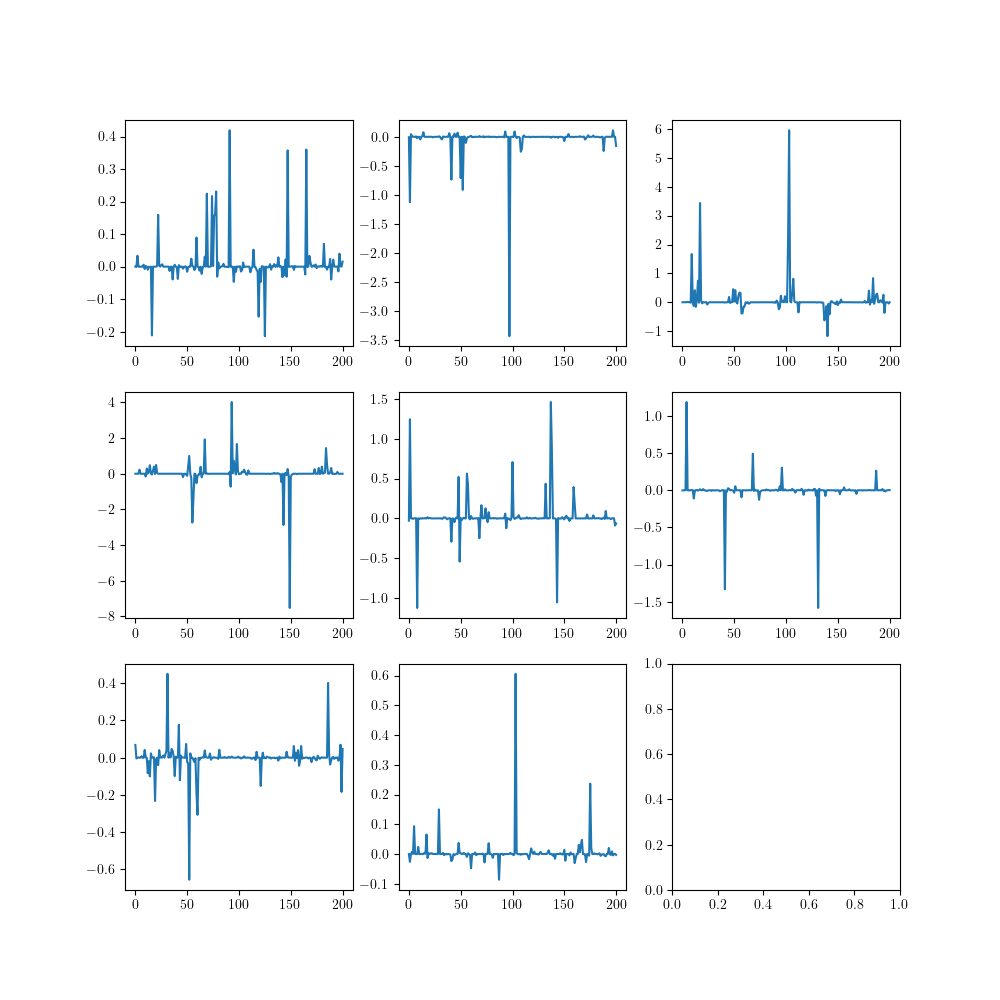

In [30]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(mult_tape[:, i])

In [31]:
mult_tape_int = np.trapz(np.abs(mult_tape), axis=0)

In [32]:
mult_tape_int

array([ 4.11698958,  9.27706538, 27.25031894, 35.94459414, 11.68146442,
        6.57745624,  4.69993211,  2.0516495 ])

In [33]:
mult_tape_fft = np.fft.rfft(mult_tape, axis=0)

/Users/verhoef/miniconda3/envs/harmonic_gw/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


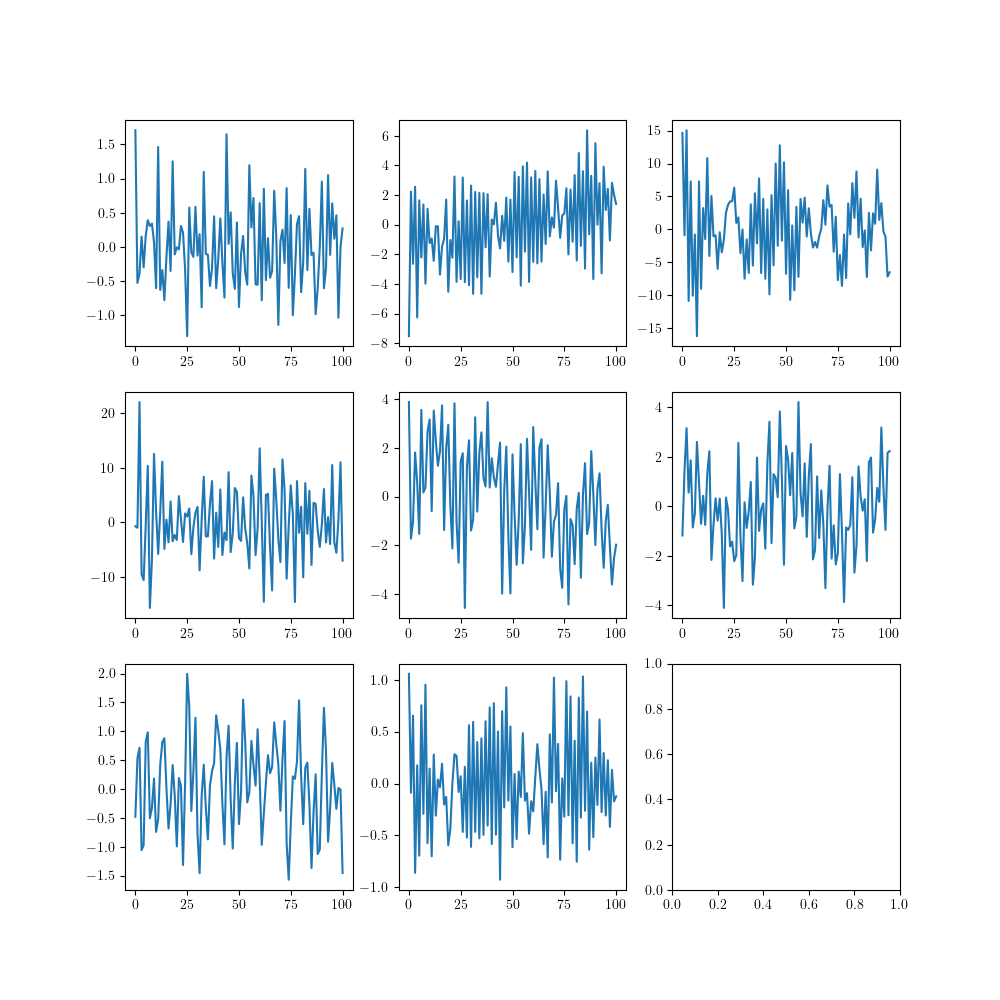

In [34]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(mult_tape_fft[:, i])

In [35]:
mult_tape_fft_tots = np.trapz(np.abs(mult_tape_fft), axis=0)

In [36]:
mult_tape_fft_tots

array([ 80.77326814, 369.60166981, 713.01484662, 931.61582974,
       271.1766738 , 223.56619299,  95.62329824,  65.49751023])

In [37]:
mult_tape_fft_maxes = np.max(np.abs(mult_tape_fft), axis=0)

In [38]:
mult_tape_fft_maxes

array([ 2.01922007,  7.53087682, 16.66391123, 22.84965835,  6.19682025,
        4.42611887,  2.16634103,  1.16495498])

In [118]:
tape_corr_coeffs = np.empty((raw_tape.shape[0] - 1, raw_tape.shape[1], raw_tape.shape[2]))
for i in tqdm(range(raw_tape.shape[0] - 1)):
    for angle_ind in range(raw_tape.shape[2]):
        tape_corr_coeffs[i, :, angle_ind] = scipy.signal.correlate(raw_tape[i, :, angle_ind], raw_tape[i + 1, :, angle_ind], mode='same')

  0%|          | 0/7 [00:00<?, ?it/s]

In [119]:
tape_corr_coeffs.shape

(7, 256, 8)

In [120]:
[np.mean([np.argmax(tape_corr_coeffs[i, :, j]) for i in range(tape_corr_coeffs.shape[0])]) - 128. for j in range(tape_corr_coeffs.shape[-1])]

[27.85714285714286,
 13.428571428571416,
 4.285714285714278,
 -1.4285714285714306,
 -8.285714285714292,
 -21.57142857142857,
 -55.28571428571429,
 79.0]

In [121]:
[np.var([np.argmax(tape_corr_coeffs[i, :, j]) for i in range(tape_corr_coeffs.shape[0])]) for j in range(tape_corr_coeffs.shape[-1])]

[8.693877551020408,
 6.244897959183674,
 1.0612244897959184,
 2.8163265306122445,
 5.9183673469387745,
 2.2448979591836737,
 34.204081632653065,
 181.14285714285714]

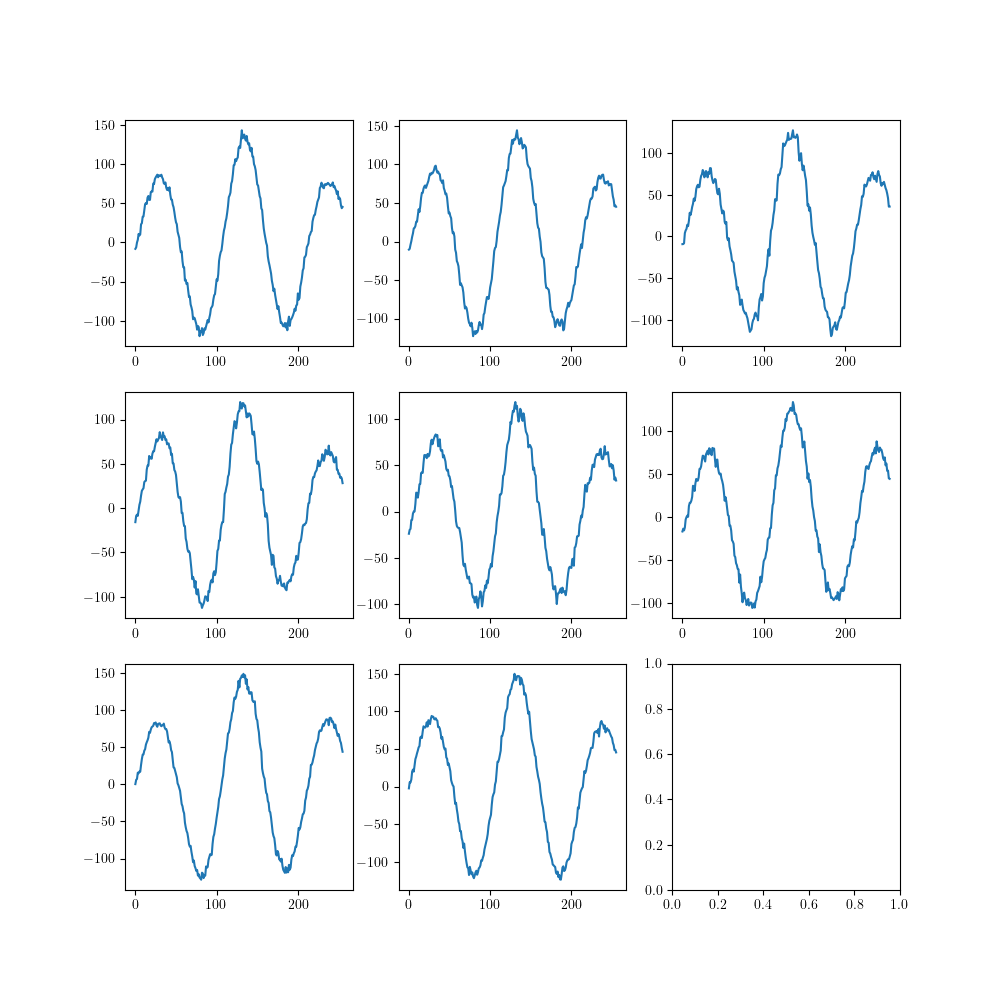

In [88]:
F, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.reshape(-1)[:-1]):
    ax.plot(tape_corr_coeffs[i, :, 1])